# GroundWater Level Prediction in India

* The Pandas library in Python provides excellent, built-in support for time series data.
* Pandas represents time series datasets as a Series.
* A Series is a one-dimensional array with a time label for each row.
* A Dataframe is a collection of series

**DATASETS**
1. **[raw_data](#Loading-Dataframe-from-csv-file)** ------- Raw Dataframe
2. **[dataframe](#Removing-Duplicates)** ------- Data Cleaning (Duplicates removed, Null Treatment, Outlier Treatment) 
3. **[data_POMRB](#Made-a-copy-of-the-original-dataframe)** ------- Data with only State, District, Quarter, POMRB
4. **[data_PREMON](#Made-a-copy-of-the-original-dataframe)** ------- Data with only State, District, Quarter, PREMON 
5. **[data_MONSOON](#Made-a-copy-of-the-original-dataframe)** ------- Data with only State, District, Quarter, MONSOON
6. **[data_POMKH](#Made-a-copy-of-the-original-dataframe)** ------- Data with only State, District, Quarter, POMKH
7. **[df](#Dataframe-with-waterlevel-of-all-quarters-in-single-column)** ------- Concat data_POMRB, data_PREMON, data_MONSOON, data_POMKH

###### Current Working Directory

In [1]:
import os
os.getcwd()

'/Users/zee.aks/Documents/Desk/aval/Waterlevel'

# Libraries  Used

In [121]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

%matplotlib inline
#to increase the size of figures
plt.rcParams['figure.figsize'] = [10,6]

###### Ignore Warnings

In [4]:
warnings.filterwarnings('ignore')

###### Loading Dataframe from csv file 

In [5]:
# Download csv file from resources and put it in working directory
raw_data = pd.read_csv('India_GWL.csv')

In [7]:
raw_data.head(1)

,STATE,DISTRICT,TEH_NAME,BLOCK_NAME,LAT,LON,SITE_NAME,SITE_TYPE,WLCODE,YEAR,MONSOON,POMRB,POMKH,PREMON
0,DL,Central,Central Delhi,Darya Ganj,28.639444,77.248889,Rajghat Pz,Tube Well,W18935,2018,NaN,1.05,NaN,NaN


# Exploring Raw Data

###### First five records of raw data

In [8]:
raw_data.head()

,STATE,DISTRICT,TEH_NAME,BLOCK_NAME,LAT,LON,SITE_NAME,SITE_TYPE,WLCODE,YEAR,MONSOON,POMRB,POMKH,PREMON
0,DL,Central,Central Delhi,Darya Ganj,28.639444,77.248889,Rajghat Pz,Tube Well,W18935,2018,NaN,1.05,NaN,NaN
1,DL,Central,Central Delhi,Darya Ganj,28.639444,77.248889,Rajghat Pz,Tube Well,W18935,2017,NaN,1.50,NaN,34.20
2,DL,Central,Central Delhi,Darya Ganj,28.639444,77.248889,Rajghat Pz,Tube Well,W18935,2016,1.55,NaN,1.57,1.84
3,DL,Central,Central Delhi,Darya Ganj,28.639444,77.248889,Rajghat Pz,Tube Well,W18935,2015,1.02,1.80,1.82,2.00
4,DL,Central,Central Delhi,Darya Ganj,28.639444,77.248889,Rajghat Pz,Tube Well,W18935,2014,2.12,1.88,1.88,1.99


#### Number of Districts in the Data Set

In [9]:
raw_data.DISTRICT.nunique()

560

#### Number of States in the DATA SET

In [10]:
raw_data.STATE.nunique()

31

###### Size

In [11]:
raw_data.shape

(331292, 14)

###### Descriptive Statistics

In [12]:
raw_data.describe()

,LAT,LON,YEAR,MONSOON,POMRB,POMKH,PREMON
count,331292.000000,331292.000000,331292.000000,255662.000000,276962.000000,278782.000000,262803.000000
mean,21.041551,79.126810,2007.885681,6.826723,8.084462,7.224877,9.697176
std,5.819674,4.924398,6.853352,9.983338,9.818163,9.958390,10.409561
min,8.083333,68.533333,1994.000000,-1.780000,-2.190000,-2.330000,-1.880000
25%,17.133333,75.742778,2002.000000,1.780000,3.260000,2.430000,4.590000
50%,21.817222,77.818750,2008.000000,3.950000,5.500000,4.410000,7.170000
75%,25.366667,82.268056,2014.000000,7.960000,9.120000,8.070000,11.030000
max,34.616944,96.133333,2018.000000,534.000000,268.000000,298.520000,534.000000


###### Data Type

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331292 entries, 0 to 331291
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   STATE       331292 non-null  object 
 1   DISTRICT    331292 non-null  object 
 2   TEH_NAME    331292 non-null  object 
 3   BLOCK_NAME  331292 non-null  object 
 4   LAT         331292 non-null  float64
 5   LON         331292 non-null  float64
 6   SITE_NAME   331292 non-null  object 
 7   SITE_TYPE   331292 non-null  object 
 8   WLCODE      331292 non-null  object 
 9   YEAR        331292 non-null  int64  
 10  MONSOON     255662 non-null  float64
 11  POMRB       276962 non-null  float64
 12  POMKH       278782 non-null  float64
 13  PREMON      262803 non-null  float64
dtypes: float64(6), int64(1), object(7)
memory usage: 35.4+ MB


###### Count

In [14]:
raw_data.count()

STATE         331292
DISTRICT      331292
TEH_NAME      331292
BLOCK_NAME    331292
LAT           331292
LON           331292
SITE_NAME     331292
SITE_TYPE     331292
WLCODE        331292
YEAR          331292
MONSOON       255662
POMRB         276962
POMKH         278782
PREMON        262803
dtype: int64

###### Null Values

In [15]:
raw_data.isnull().sum()

STATE             0
DISTRICT          0
TEH_NAME          0
BLOCK_NAME        0
LAT               0
LON               0
SITE_NAME         0
SITE_TYPE         0
WLCODE            0
YEAR              0
MONSOON       75630
POMRB         54330
POMKH         52510
PREMON        68489
dtype: int64

###### Dublicate Values

In [16]:
raw_data[raw_data.duplicated(keep=False)]

,STATE,DISTRICT,TEH_NAME,BLOCK_NAME,LAT,LON,SITE_NAME,SITE_TYPE,WLCODE,YEAR,MONSOON,POMRB,POMKH,PREMON
5355,PB,Gurdaspur,Dhar Kalan,Dhar Kalan,32.401944,75.744444,Matti-PZ,Tube Well,W33626,2018,NaN,19.40,NaN,NaN
5390,PB,Gurdaspur,Dhar Kalan,Dhar Kalan,32.401944,75.744444,Matti-PZ,Tube Well,W33626,2018,NaN,19.40,NaN,NaN
5436,PB,Gurdaspur,Dhar Kalan,Dhar Kalan,32.401944,75.744444,Matti-PZ,Tube Well,W33626,2017,NaN,27.65,16.10,NaN
5474,PB,Gurdaspur,Dhar Kalan,Dhar Kalan,32.401944,75.744444,Matti-PZ,Tube Well,W33626,2017,NaN,27.65,16.10,NaN
33406,JK,Data Not Available,SUNDERBANI,Mirpur,33.067222,74.486667,Thandapani,Dug Well,W33363,2018,NaN,1.83,NaN,NaN
33407,JK,Data Not Available,SUNDERBANI,Mirpur,33.067222,74.486667,Thandapani,Dug Well,W33363,2018,NaN,1.83,NaN,NaN
33428,JK,Data Not Available,SUNDERBANI,Mirpur,33.067222,74.486667,Thandapani,Dug Well,W33363,2017,0.67,1.37,1.42,2.12
33429,JK,Data Not Available,SUNDERBANI,Mirpur,33.067222,74.486667,Thandapani,Dug Well,W33363,2017,0.67,1.37,1.42,2.12


# Data Cleaning

### Removing Duplicates

In [17]:
dataframe = raw_data.copy()
dataframe.drop_duplicates(keep='first',inplace=True,ignore_index=True)

###### Check again for duplicates

In [18]:
dataframe[dataframe.duplicated(keep=False)]

,STATE,DISTRICT,TEH_NAME,BLOCK_NAME,LAT,LON,SITE_NAME,SITE_TYPE,WLCODE,YEAR,MONSOON,POMRB,POMKH,PREMON


In [19]:
dataframe.shape

(331288, 14)

### Null Treatment

<AxesSubplot:>

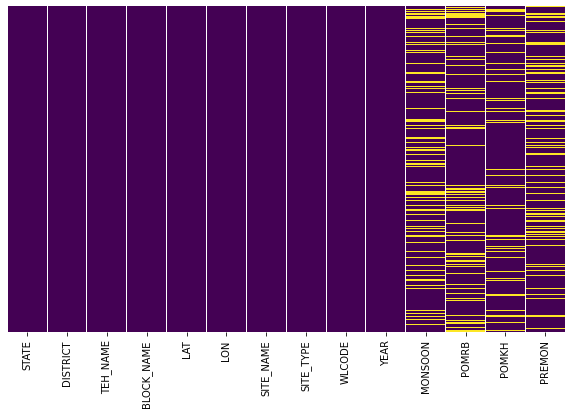

In [21]:
#heatmap to check for null values in the dataframe
sns.heatmap(dataframe.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Replacing Null values with Median for POMRB, PREMON, MONSOON & POMKH

In [22]:
dataframe.POMRB.fillna(dataframe.POMRB.quantile(0.5),inplace = True)
dataframe.PREMON.fillna(dataframe.PREMON.quantile(0.5),inplace = True)
dataframe.MONSOON.fillna(dataframe.MONSOON.quantile(0.5),inplace = True)
dataframe.POMKH.fillna(dataframe.POMKH.quantile(0.5),inplace = True)

In [23]:
dataframe.isnull().sum()

STATE         0
DISTRICT      0
TEH_NAME      0
BLOCK_NAME    0
LAT           0
LON           0
SITE_NAME     0
SITE_TYPE     0
WLCODE        0
YEAR          0
MONSOON       0
POMRB         0
POMKH         0
PREMON        0
dtype: int64

### Outliers Treatment

###### Post Monsoon Rabi (January to March)


Mean :  7.660565527137524
Median :  5.5
Mode :  5.5
Max :  268.0
Min :  -2.19
Unique :  6812
Variance :  81.50272138280054
Null :  0

99th quantile value of Post Monsoon Rabi is :  48.6
Number of outliers above 99th quantile :  3309


<AxesSubplot:>

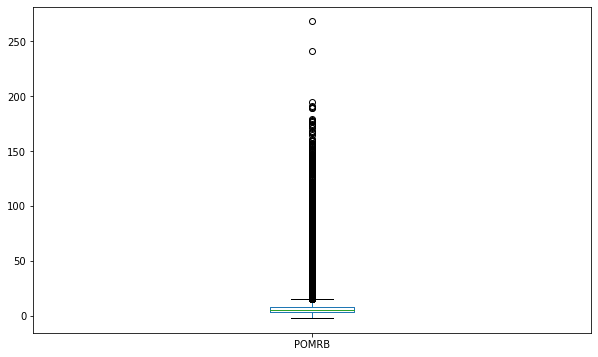

In [24]:
print('\nMean : ',dataframe.POMRB.mean())
print('Median : ',dataframe.POMRB.median())
print('Mode : ',dataframe.POMRB.mode()[0])
print('Max : ',dataframe.POMRB.max())
print('Min : ',dataframe.POMRB.min())
print('Unique : ',len(dataframe.POMRB.unique()))
print('Variance : ',dataframe.POMRB.var())
print('Null : ',dataframe.POMRB.isna().sum())
print('\n99th quantile value of Post Monsoon Rabi is : ',round(dataframe.POMRB.quantile(0.99),2))
print('Number of outliers above 99th quantile : ',len(dataframe[dataframe.POMRB > dataframe.POMRB.quantile(0.99)]))
dataframe.POMRB.plot(kind='box')

<AxesSubplot:>

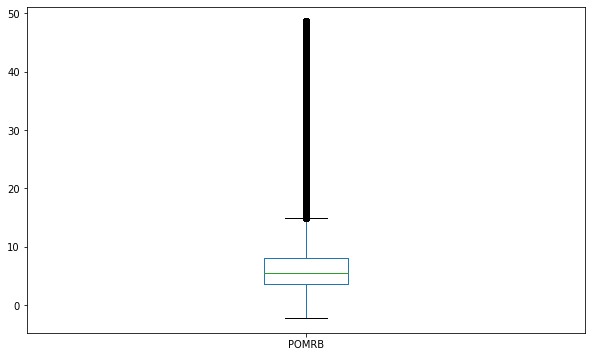

In [25]:
#replacing outliers with lower quantile & uper quantile
dataframe.POMRB.clip(dataframe.POMRB.quantile(0),dataframe.POMRB.quantile(0.99),inplace=True)

dataframe.POMRB.plot(kind = 'box')

#### Pre-Monsoon (April - June)


Mean :  9.174764523196293
Median :  7.17
Mode :  7.17
Max :  534.0
Min :  -1.88
Unique :  7084
Variance :  87.00575035511768
Null :  0

The 99th quantile of pre-monsoon is :  50.16
Number of outliers above 99th quantile is :  3313


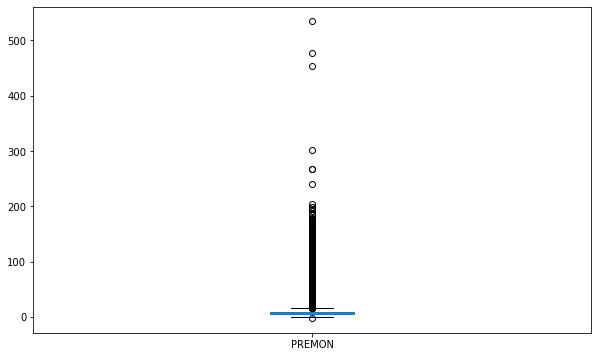

In [26]:
dataframe.PREMON.plot(kind='box')
print('\nMean : ',dataframe.PREMON.mean())
print('Median : ',dataframe.PREMON.median())
print('Mode : ',dataframe.PREMON.mode()[0])
print('Max : ',dataframe.PREMON.max())
print('Min : ',dataframe.PREMON.min())
print('Unique : ',len(dataframe.PREMON.unique()))
print('Variance : ',dataframe.PREMON.var())
print('Null : ',dataframe.PREMON.isna().sum())
print('\nThe 99th quantile of pre-monsoon is : ',round(dataframe.PREMON.quantile(0.99),2))
print('Number of outliers above 99th quantile is : ',len(dataframe[dataframe.PREMON > dataframe.PREMON.quantile(0.99)]))

<AxesSubplot:>

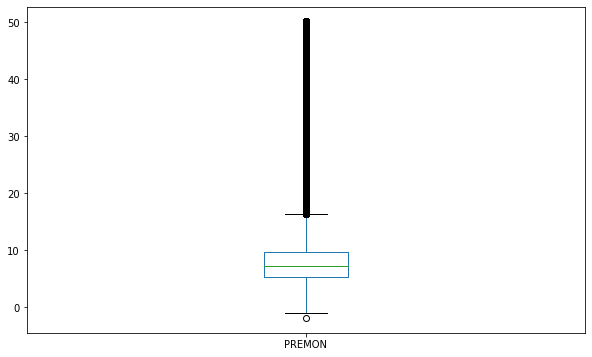

In [27]:
#replacing outliers with lower quantile & uper quantile
dataframe.PREMON.clip(dataframe.PREMON.quantile(0),dataframe.PREMON.quantile(0.99),inplace=True)

dataframe.PREMON.plot(kind = 'box')

#### Monsoon (July - September)


Mean :  6.170038197947717
Median :  3.95
Mode :  3.95
Max :  534.0
Min :  -1.78
Unique :  6676
Variance :  78.3729068519743
Null :  0

The 99th quantile of Monsoon is :  46.77
The number of values above 99th quantile is :  3313


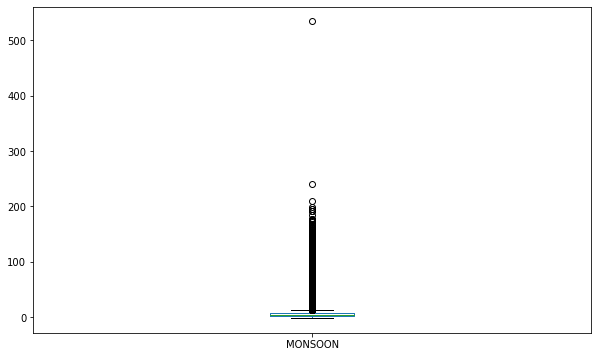

In [28]:
dataframe.MONSOON.plot(kind = 'box')
print('\nMean : ',dataframe.MONSOON.mean())
print('Median : ',dataframe.MONSOON.median())
print('Mode : ',dataframe.MONSOON.mode()[0])
print('Max : ',dataframe.MONSOON.max())
print('Min : ',dataframe.MONSOON.min())
print('Unique : ',len(dataframe.MONSOON.unique()))
print('Variance : ',dataframe.MONSOON.var())
print('Null : ',dataframe.MONSOON.isna().sum())
print('\nThe 99th quantile of Monsoon is : ',round(dataframe.MONSOON.quantile(0.99),2))
print('The number of values above 99th quantile is : ',len(dataframe[dataframe.MONSOON > dataframe.MONSOON.quantile(0.99)]))

<AxesSubplot:>

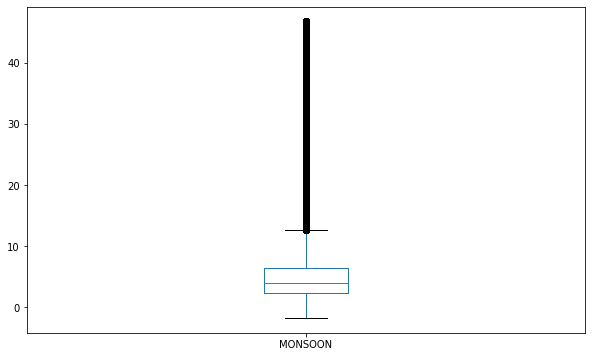

In [29]:
dataframe.MONSOON.clip(dataframe.MONSOON.quantile(0),dataframe.MONSOON.quantile(0.99),inplace=True)
dataframe.MONSOON.plot(kind='box')

#### Post Monsoon Kharif (October to December)


Mean :  6.778719603480488
Median :  4.41
Mode :  4.41
Max :  298.52
Min :  -2.33
Unique :  6899
Variance :  84.50851855607374
Null :  0

 The 99th quantile of post monsoon kharif is :  48.48
The number of values above 99th quantile is :  3312


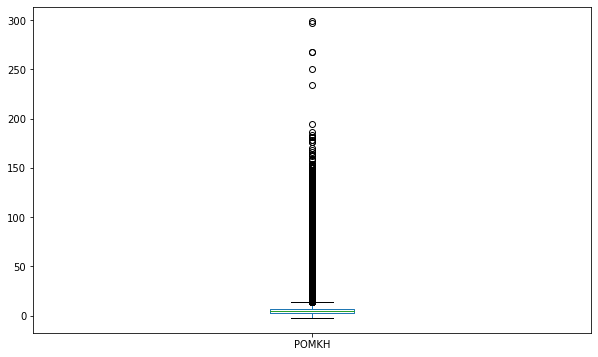

In [30]:
dataframe.POMKH.plot(kind='box')
print('\nMean : ',dataframe.POMKH.mean())
print('Median : ',dataframe.POMKH.median())
print('Mode : ',dataframe.POMKH.mode()[0])
print('Max : ',dataframe.POMKH.max())
print('Min : ',dataframe.POMKH.min())
print('Unique : ',len(dataframe.POMKH.unique()))
print('Variance : ',dataframe.POMKH.var())
print('Null : ',dataframe.POMKH.isna().sum())
print('\n The 99th quantile of post monsoon kharif is : ',round(dataframe.POMKH.quantile(0.99),2))
print('The number of values above 99th quantile is : ',len(dataframe[dataframe.POMKH > dataframe.POMKH.quantile(0.99)]))

<AxesSubplot:>

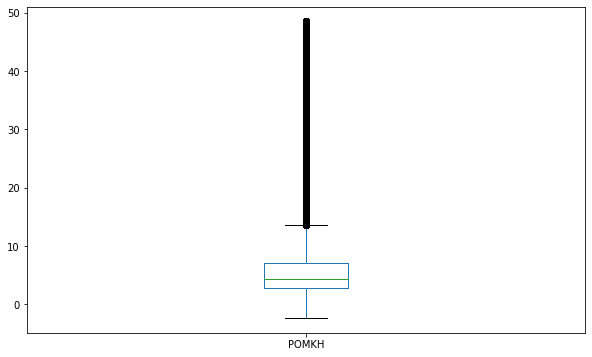

In [31]:
dataframe.POMKH.clip(dataframe.POMKH.quantile(0),dataframe.POMKH.quantile(0.99),inplace = True)
dataframe.POMKH.plot(kind='box')

# Feature Engineering 

###### Extracting each Quarter from dataframe one by one

In [32]:
dataframe.head(1)

,STATE,DISTRICT,TEH_NAME,BLOCK_NAME,LAT,LON,SITE_NAME,SITE_TYPE,WLCODE,YEAR,MONSOON,POMRB,POMKH,PREMON
0,DL,Central,Central Delhi,Darya Ganj,28.639444,77.248889,Rajghat Pz,Tube Well,W18935,2018,3.95,1.05,4.41,7.17


#### Made a copy of the original dataframe

In [39]:
data_POMRB = dataframe[['STATE','DISTRICT','YEAR','POMRB']].copy()
data_PREMON = dataframe[['STATE','DISTRICT','YEAR','PREMON']].copy()
data_MONSOON = dataframe[['STATE','DISTRICT','YEAR','MONSOON']].copy()
data_POMKH = dataframe[['STATE','DISTRICT','YEAR','POMKH']].copy()

data_POMRB.head(3)

,STATE,DISTRICT,YEAR,POMRB
0,DL,Central,2018,1.05
1,DL,Central,2017,1.50
2,DL,Central,2016,5.50


In [40]:
#Renaming the columns with same name
data_POMRB.rename(columns={'POMRB':'LEVEL','YEAR':'QUARTER'},inplace = True)
data_PREMON.rename(columns={'PREMON':'LEVEL','YEAR':'QUARTER'},inplace = True)
data_MONSOON.rename(columns={'MONSOON':'LEVEL','YEAR':'QUARTER'},inplace = True)
data_POMKH.rename(columns={'POMKH':'LEVEL','YEAR':'QUARTER'},inplace = True)

#### ADDING MONTHS TO QUARTERS
* Post-monsoon Rabi (January to March) -- POMRB
* Pre monsoon (April to June) -- PREMON
* Monsoon (July to September) -- MONSOON
* Post-monsoon Kharif (October to December) -- POMKH

In [41]:
data_POMRB.QUARTER = data_POMRB.QUARTER.apply(lambda x: str(x)+"-01-01")
data_PREMON.QUARTER = data_PREMON.QUARTER.apply(lambda x: str(x)+"-04-01")
data_MONSOON.QUARTER = data_MONSOON.QUARTER.apply(lambda x: str(x)+"-07-01")
data_POMKH.QUARTER = data_POMKH.QUARTER.apply(lambda x: str(x)+"-10-01")

#### change to date-time data type

In [42]:
data_POMRB['QUARTER'].dtype

dtype('O')

In [43]:
data_POMRB.QUARTER = pd.to_datetime(data_POMRB.QUARTER)
data_PREMON.QUARTER = pd.to_datetime(data_PREMON.QUARTER)
data_MONSOON.QUARTER = pd.to_datetime(data_MONSOON.QUARTER)
data_POMKH.QUARTER = pd.to_datetime(data_POMKH.QUARTER)

In [44]:
data_POMRB['QUARTER'].dtype

dtype('<M8[ns]')

#### Shape

In [45]:
data_POMRB.shape

(331288, 4)

#### Dataframe with waterlevel of all quarters in single column

In [46]:
df = pd.concat([data_POMRB,data_PREMON,data_MONSOON,data_POMKH],axis=0)
df.head(3)

,STATE,DISTRICT,QUARTER,LEVEL
0,DL,Central,2018-01-01,1.05
1,DL,Central,2017-01-01,1.50
2,DL,Central,2016-01-01,5.50


In [47]:
df.shape

(1325152, 4)

#### Changing quarterly data back to year

In [48]:
data_POMRB.QUARTER = data_POMRB.QUARTER.dt.year
data_PREMON.QUARTER = data_PREMON.QUARTER.dt.year
data_MONSOON.QUARTER = data_MONSOON.QUARTER.dt.year
data_POMKH.QUARTER = data_POMKH.QUARTER.dt.year

In [49]:
data_POMRB.QUARTER.dtype

dtype('int64')

In [50]:
data_PREMON.QUARTER.dtype

dtype('int64')

#### Groupby

In [51]:
data_POMRB = data_POMRB.groupby(['STATE','DISTRICT','QUARTER'],as_index=False).mean()
data_PREMON = data_PREMON.groupby(['STATE','DISTRICT','QUARTER'],as_index=False).mean()
data_MONSOON = data_MONSOON.groupby(['STATE','DISTRICT','QUARTER'],as_index=False).mean()
data_POMKH = data_POMKH.groupby(['STATE','DISTRICT','QUARTER'],as_index=False).mean()

df = df.sort_values(['STATE','DISTRICT','QUARTER'],ascending = True)
data_POMRB.sort_values(['STATE','DISTRICT','QUARTER'],ascending = True)
data_PREMON.sort_values(['STATE','DISTRICT','QUARTER'],ascending = True)
data_MONSOON.sort_values(['STATE','DISTRICT','QUARTER'],ascending = True)
data_POMKH.sort_values(['STATE','DISTRICT','QUARTER'],ascending = True)

df = df.groupby(['STATE','DISTRICT','QUARTER'], as_index= False).mean()
data_POMRB.head(3)

,STATE,DISTRICT,QUARTER,LEVEL
0,AN,South Andaman,2013,5.5
1,AN,South Andaman,2014,5.5
2,AN,South Andaman,2015,5.5


#### Changing data to date time format again

In [52]:
data_POMRB.QUARTER.dtype

dtype('int64')

In [53]:
data_POMRB.head()

,STATE,DISTRICT,QUARTER,LEVEL
0,AN,South Andaman,2013,5.5
1,AN,South Andaman,2014,5.5
2,AN,South Andaman,2015,5.5
3,AN,South Andaman,2016,5.5
4,AN,South Andaman,2017,5.5


In [54]:
data_POMRB.index = data_POMRB.QUARTER
data_PREMON.index = data_PREMON.QUARTER
data_MONSOON.index = data_MONSOON.QUARTER
data_POMKH.index = data_POMKH.QUARTER

df.index = df.QUARTER

In [55]:
data_POMRB.head()

,STATE,DISTRICT,QUARTER,LEVEL
QUARTER,,,,
2013,AN,South Andaman,2013,5.5
2014,AN,South Andaman,2014,5.5
2015,AN,South Andaman,2015,5.5
2016,AN,South Andaman,2016,5.5
2017,AN,South Andaman,2017,5.5


In [56]:
data_POMRB.index.dtype

dtype('int64')

In [57]:
data_POMRB.QUARTER.dtype

dtype('int64')

In [58]:
df.shape

(50152, 4)

# Data Visualization

### On District level

#### Considering level of all seasons in Ludhiana District

<AxesSubplot:ylabel='LEVEL'>

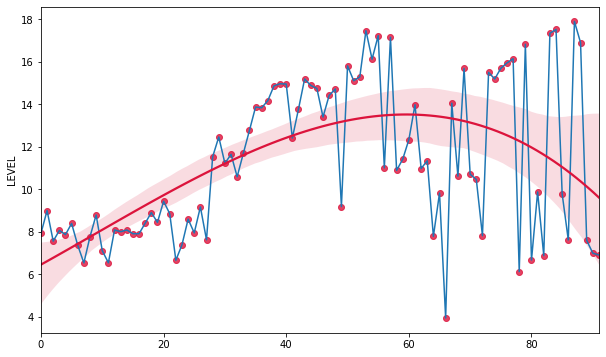

In [59]:
a = df['LEVEL'][df.DISTRICT == "Ludhiana"]
plt.plot(a.reset_index()['LEVEL'])

sns.regplot(x = a.reset_index().index.values , y = a , order = 3 , marker = 'o' , color = 'crimson')

#### Considering levels of Post Monsoon Rabi season data in Ludhiana District

<AxesSubplot:xlabel='QUARTER', ylabel='LEVEL'>

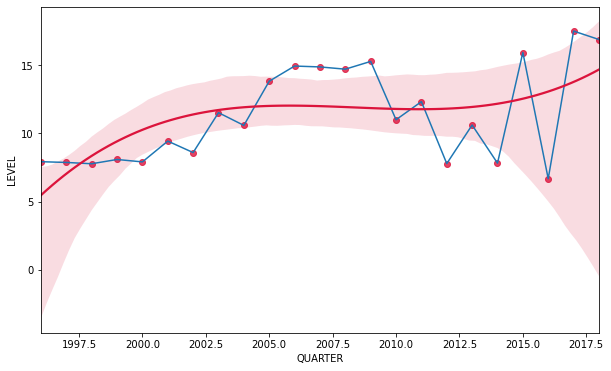

In [60]:
a = data_POMRB['LEVEL'][data_POMRB['DISTRICT']=='Ludhiana'].groupby(['QUARTER']).mean()
a.plot()
sns.regplot(x = a.index.values, y = a, order = 3 , marker = 'o' , color = 'crimson')

In [61]:
data_POMRB['QUARTER'].dtype

dtype('int64')

In [62]:
df.head()

,STATE,DISTRICT,QUARTER,LEVEL
QUARTER,,,,
2013-01-01,AN,South Andaman,2013-01-01,5.500000
2013-04-01,AN,South Andaman,2013-04-01,1.999041
2013-07-01,AN,South Andaman,2013-07-01,3.950000
2013-10-01,AN,South Andaman,2013-10-01,1.476986
2014-01-01,AN,South Andaman,2014-01-01,5.500000


#### Considering levels of Pre Monsoon season data in Ludhiana District

<AxesSubplot:xlabel='QUARTER', ylabel='LEVEL'>

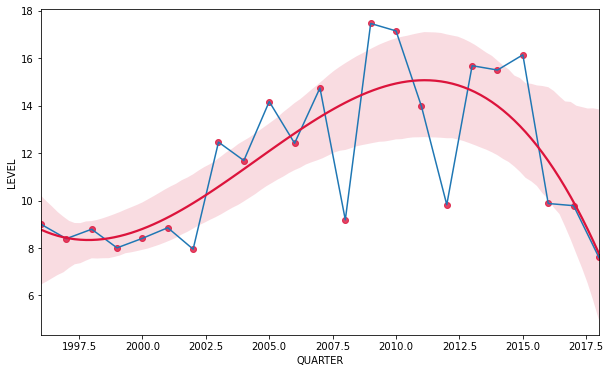

In [63]:
a = data_PREMON['LEVEL'][data_PREMON.DISTRICT == 'Ludhiana'].groupby(['QUARTER']).mean()
a.plot()
sns.regplot( x = a.index.values, y = a, order = 3 , marker = 'o' , color = 'crimson')

#### Considering levels of Monsoon season data in Ludhiana District

<AxesSubplot:xlabel='QUARTER', ylabel='LEVEL'>

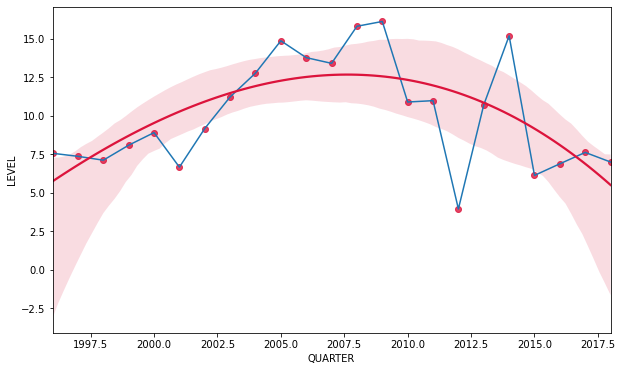

In [64]:
a = data_MONSOON['LEVEL'][data_MONSOON.DISTRICT == 'Ludhiana'].groupby(['QUARTER']).mean()
a.plot()
sns.regplot( x = a.index.values, y = a, order = 3 , marker = 'o' , color = 'crimson')

#### Considering levels of Post Monsoon Kharif season data in Ludhiana District

<AxesSubplot:xlabel='QUARTER', ylabel='LEVEL'>

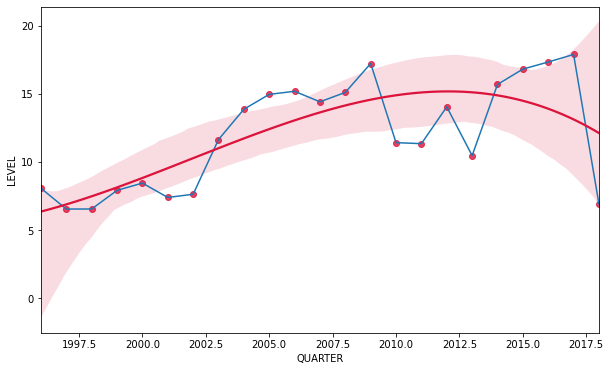

In [65]:
a = data_POMKH['LEVEL'][data_POMKH.DISTRICT == 'Ludhiana'].groupby(['QUARTER']).mean()
a.plot()
sns.regplot( x = a.index.values, y = a, order = 3 , marker = 'o' , color = 'crimson')

* **Autocorrelation Function**
* **Partial Autocorrelation Fucntion**
* **Seasonal Decompose**

#### Considering all the dataset 

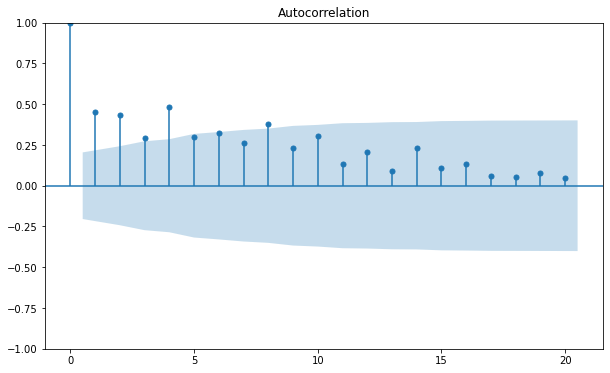

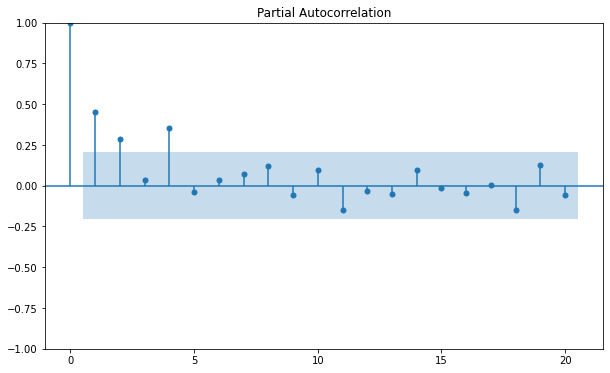

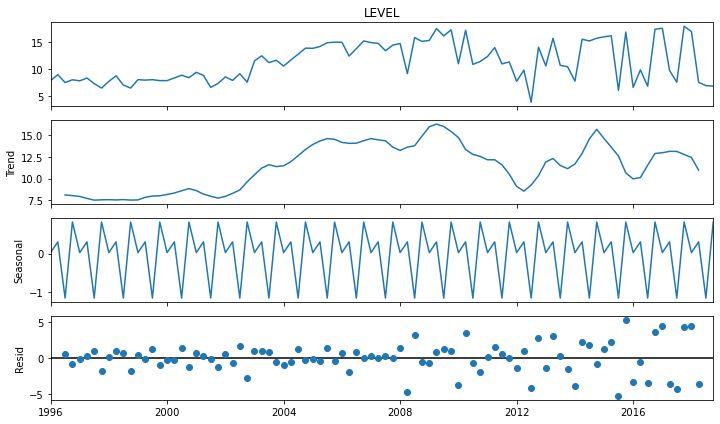

In [66]:
plot_acf(df['LEVEL'][df.DISTRICT == 'Ludhiana']).show()
plot_pacf(df['LEVEL'][df.DISTRICT == 'Ludhiana']).show()

seasonal_decompose(df['LEVEL'][df.DISTRICT == 'Ludhiana'], model = 'additive').plot().show()

#### Again adding months to quarters as in seasonal decompose, x must be a pandas object with a DatetimeIndex

In [67]:
data_POMRB.QUARTER = data_POMRB.QUARTER.apply(lambda x: str(x) + "-01-01")
data_POMRB.index = pd.to_datetime(data_POMRB.QUARTER)

data_PREMON.QUARTER = data_PREMON.QUARTER.apply(lambda x: str(x) + '-04-01')
data_PREMON.index = pd.to_datetime(data_PREMON.QUARTER)

data_MONSOON.QUARTER = data_MONSOON.QUARTER.apply(lambda x: str(x) + '-07-01')
data_MONSOON.index = pd.to_datetime(data_MONSOON.QUARTER)

data_POMKH.QUARTER = data_POMKH.QUARTER.apply(lambda x: str(x) + '-10-01')
data_POMKH.index = pd.to_datetime(data_POMKH.QUARTER)

data_POMRB.head()

,STATE,DISTRICT,QUARTER,LEVEL
QUARTER,,,,
2013-01-01,AN,South Andaman,2013-01-01,5.5
2014-01-01,AN,South Andaman,2014-01-01,5.5
2015-01-01,AN,South Andaman,2015-01-01,5.5
2016-01-01,AN,South Andaman,2016-01-01,5.5
2017-01-01,AN,South Andaman,2017-01-01,5.5


In [68]:
data_PREMON.head()

,STATE,DISTRICT,QUARTER,LEVEL
QUARTER,,,,
2013-04-01,AN,South Andaman,2013-04-01,1.999041
2014-04-01,AN,South Andaman,2014-04-01,3.023889
2015-04-01,AN,South Andaman,2015-04-01,3.440139
2016-04-01,AN,South Andaman,2016-04-01,3.190282
2017-04-01,AN,South Andaman,2017-04-01,3.488824


### Post Monsoon Rabi

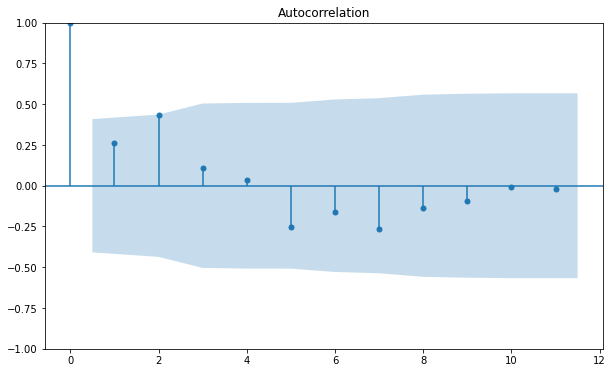

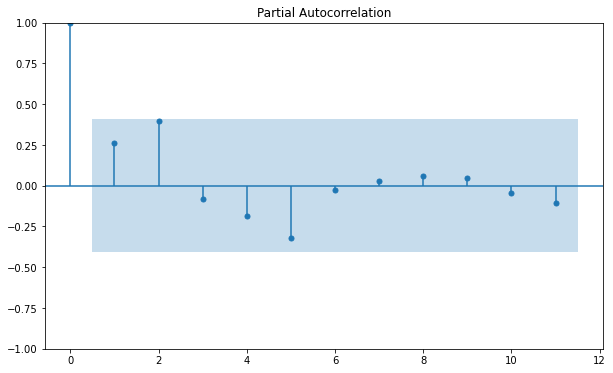

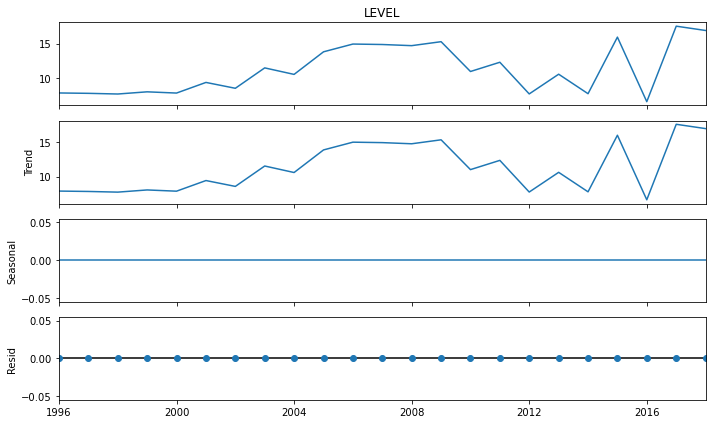

In [69]:
plot_acf(data_POMRB['LEVEL'][data_POMRB.DISTRICT == 'Ludhiana']).show()
plot_pacf(data_POMRB['LEVEL'][data_POMRB.DISTRICT == 'Ludhiana']).show()

seasonal_decompose(data_POMRB['LEVEL'][data_POMRB.DISTRICT == 'Ludhiana'], model = 'additive').plot().show()
#fig = result.plot()
#plot_mpl(fig)

### Pre Monsoon

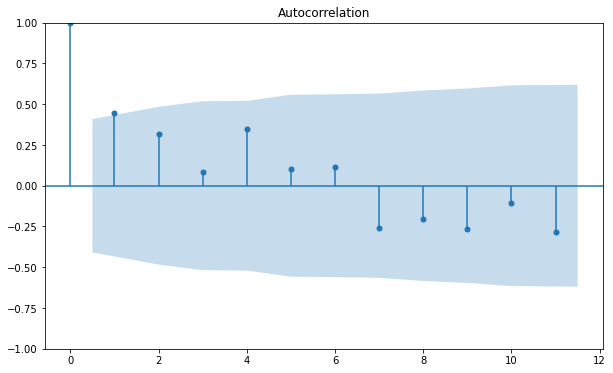

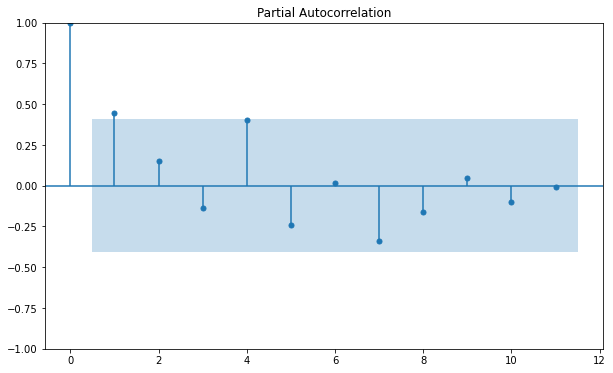

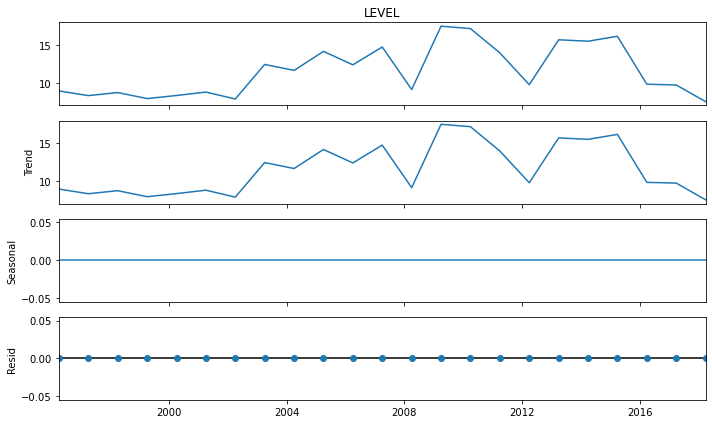

In [70]:
plot_acf(data_PREMON['LEVEL'][data_PREMON.DISTRICT == 'Ludhiana']).show()
plot_pacf(data_PREMON['LEVEL'][data_PREMON.DISTRICT == 'Ludhiana']).show()

seasonal_decompose(data_PREMON['LEVEL'][data_PREMON.DISTRICT == 'Ludhiana'], model = 'additive').plot().show()

### Monsoon

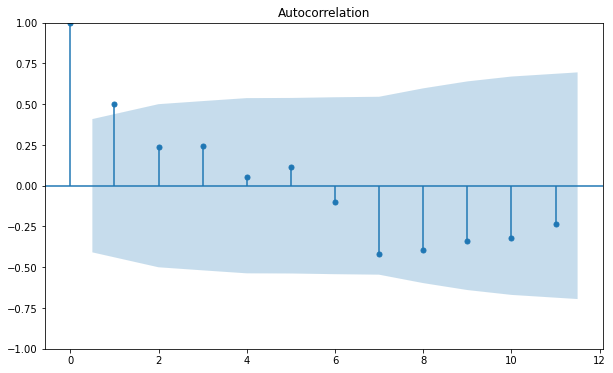

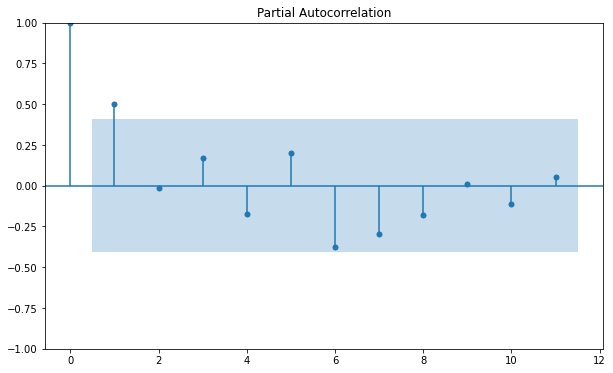

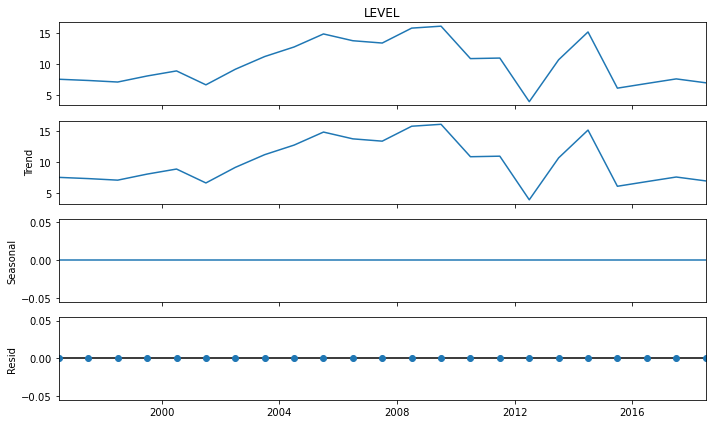

In [71]:
plot_acf(data_MONSOON['LEVEL'][data_MONSOON.DISTRICT == 'Ludhiana']).show()
plot_pacf(data_MONSOON['LEVEL'][data_MONSOON.DISTRICT == 'Ludhiana']).show()

seasonal_decompose(data_MONSOON['LEVEL'][data_MONSOON.DISTRICT == 'Ludhiana'], model = 'additive').plot().show()

### Post Monsoon Kharif

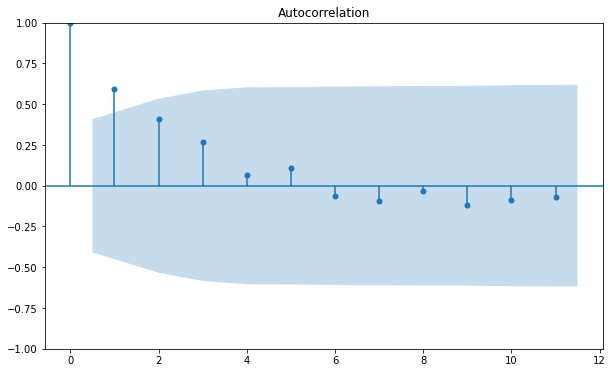

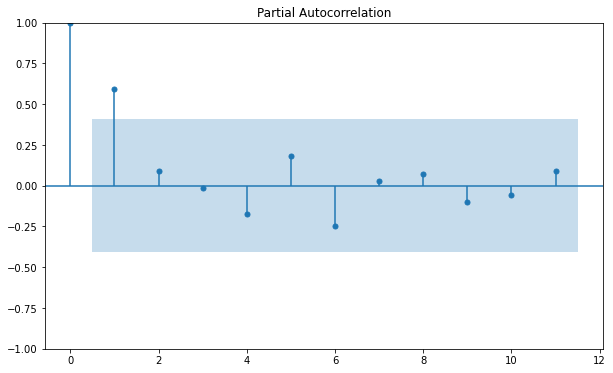

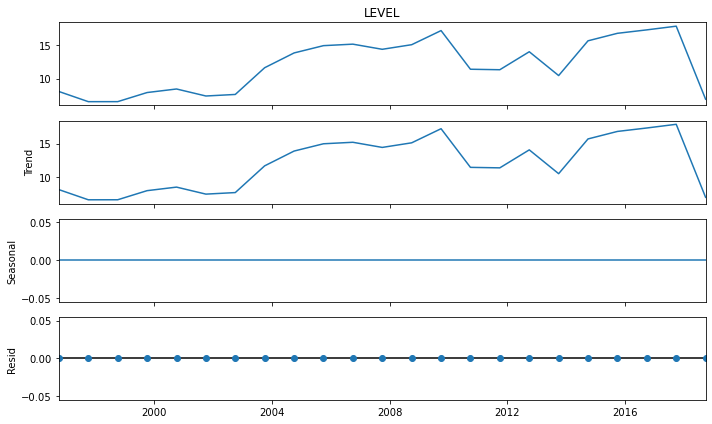

In [72]:
plot_acf(data_POMKH['LEVEL'][data_POMKH.DISTRICT == 'Ludhiana']).show()
plot_pacf(data_POMKH['LEVEL'][data_POMKH.DISTRICT == 'Ludhiana']).show()

seasonal_decompose(data_POMKH['LEVEL'][data_POMKH.DISTRICT == 'Ludhiana'], model = 'additive').plot().show()

## Presistance Model

#### POMRB

In [73]:
#taking dataset of ludhiana district only
ldh_POMRB = pd.DataFrame(data_POMRB['LEVEL'][data_POMRB.DISTRICT == 'Ludhiana'])
ldh_POMRB.head()

,LEVEL
QUARTER,
1996-01-01,7.923939
1997-01-01,7.869687
1998-01-01,7.773235
1999-01-01,8.086538
2000-01-01,7.909583


In [74]:
ldh_POMRB['t'] = ldh_POMRB.shift(1)

In [75]:
ldh_POMRB.head()

,LEVEL,t
QUARTER,,
1996-01-01,7.923939,NaN
1997-01-01,7.869687,7.923939
1998-01-01,7.773235,7.869687
1999-01-01,8.086538,7.773235
2000-01-01,7.909583,8.086538


In [76]:
train_size = int(ldh_POMRB.shape[0]*0.8)
train_size

18

In [77]:
train = ldh_POMRB[0:train_size]
test = ldh_POMRB[train_size:]

In [78]:
train.shape

(18, 2)

In [79]:
test.shape

(5, 2)

In [80]:
train_X, train_y = train['t'], train['LEVEL']
test_X, test_y = test['t'], test['LEVEL']

In [81]:
predictions = test_X.copy()

In [82]:
mse = mean_squared_error(test_y, predictions)
mse

55.503410502512885

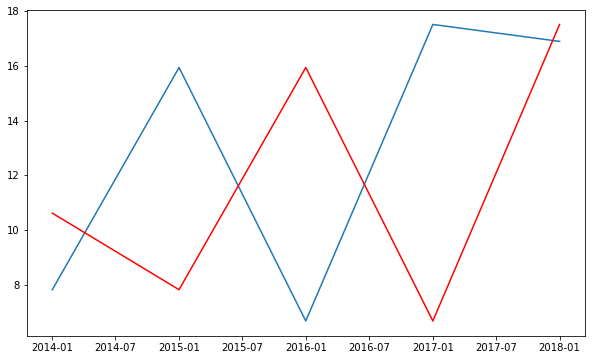

In [83]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

#### PREMON

In [84]:
#taking dataset of ludhiana district only
ldh_PREMON = pd.DataFrame(data_PREMON['LEVEL'][data_PREMON.DISTRICT == 'Ludhiana'])
ldh_PREMON.head()

,LEVEL
QUARTER,
1996-04-01,9.001212
1997-04-01,8.392500
1998-04-01,8.790294
1999-04-01,8.005769
2000-04-01,8.406667


In [85]:
ldh_PREMON['t'] = ldh_PREMON.shift(1)

In [86]:
ldh_POMRB.head()

,LEVEL,t
QUARTER,,
1996-01-01,7.923939,NaN
1997-01-01,7.869687,7.923939
1998-01-01,7.773235,7.869687
1999-01-01,8.086538,7.773235
2000-01-01,7.909583,8.086538


In [87]:
train_size = int(ldh_PREMON.shape[0]*0.8)
train_size

18

In [88]:
train = ldh_POMRB[0:train_size]
test = ldh_POMRB[train_size:]

In [89]:
train.shape

(18, 2)

In [90]:
test.shape

(5, 2)

In [91]:
train_X, train_y = train['t'], train['LEVEL']
test_X, test_y = test['t'], test['LEVEL']

In [92]:
predictions = test_X.copy()

In [93]:
mse = mean_squared_error(test_y, predictions)
mse

55.503410502512885

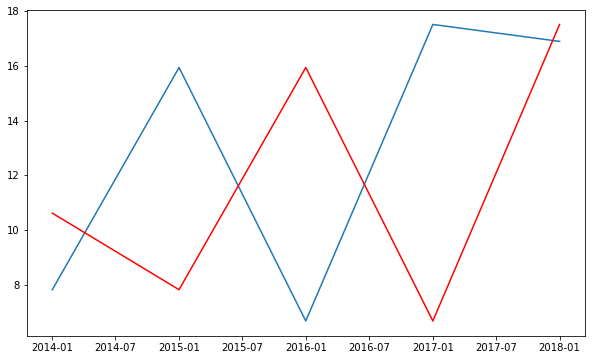

In [94]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

#### MONSOON

In [95]:
#taking dataset of ludhiana district only
ldh_MONSOON = pd.DataFrame(data_MONSOON['LEVEL'][data_MONSOON.DISTRICT == 'Ludhiana'])
ldh_MONSOON.head()

,LEVEL
QUARTER,
1996-07-01,7.561515
1997-07-01,7.364375
1998-07-01,7.113824
1999-07-01,8.086538
2000-07-01,8.903333


In [96]:
ldh_MONSOON['t'] = ldh_MONSOON.shift(1)

In [97]:
ldh_MONSOON.head()

,LEVEL,t
QUARTER,,
1996-07-01,7.561515,NaN
1997-07-01,7.364375,7.561515
1998-07-01,7.113824,7.364375
1999-07-01,8.086538,7.113824
2000-07-01,8.903333,8.086538


In [98]:
train_size = int(ldh_MONSOON.shape[0]*0.8)
train_size

18

In [99]:
train = ldh_MONSOON[0:train_size]
test = ldh_MONSOON[train_size:]

In [100]:
train.shape

(18, 2)

In [101]:
test.shape

(5, 2)

In [102]:
train_X, train_y = train['t'], train['LEVEL']
test_X, test_y = test['t'], test['LEVEL']

In [103]:
predictions = test_X.copy()

In [104]:
mse = mean_squared_error(test_y, predictions)
mse

20.70812642969733

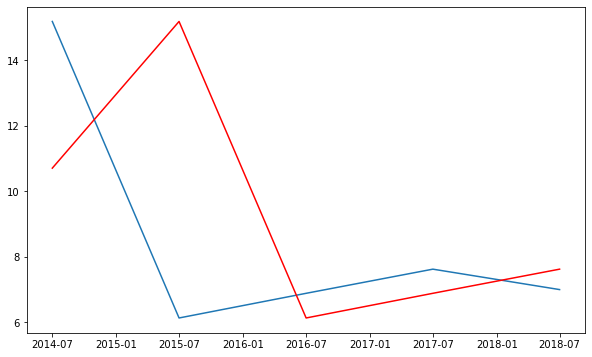

In [105]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

#### POMKH

In [106]:
#taking dataset of ludhiana district only
ldh_POMKH = pd.DataFrame(data_POMKH['LEVEL'][data_POMKH.DISTRICT == 'Ludhiana'])
ldh_POMKH.head()

,LEVEL
QUARTER,
1996-10-01,8.064242
1997-10-01,6.539062
1998-10-01,6.542647
1999-10-01,7.910769
2000-10-01,8.445000


In [107]:
ldh_POMKH['t'] = ldh_POMKH.shift(1)

In [108]:
ldh_POMKH.head()

,LEVEL,t
QUARTER,,
1996-10-01,8.064242,NaN
1997-10-01,6.539062,8.064242
1998-10-01,6.542647,6.539062
1999-10-01,7.910769,6.542647
2000-10-01,8.445000,7.910769


In [109]:
train_size = int(ldh_POMKH.shape[0]*0.8)
train_size

18

In [110]:
train = ldh_POMKH[0:train_size]
test = ldh_POMKH[train_size:]

In [111]:
train.shape

(18, 2)

In [112]:
test.shape

(5, 2)

In [113]:
train_X, train_y = train['t'], train['LEVEL']
test_X, test_y = test['t'], test['LEVEL']

In [114]:
predictions = test_X.copy()

In [115]:
mse = mean_squared_error(test_y, predictions)
mse

29.93305783910377

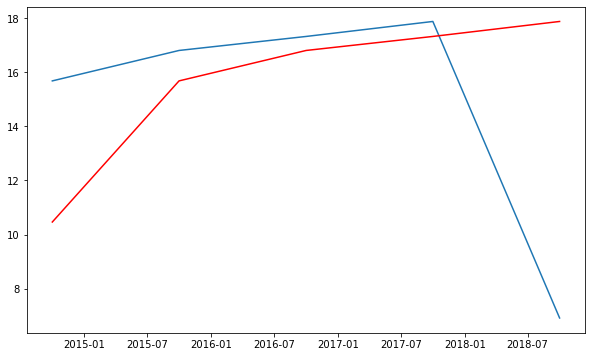

In [116]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

## AutoRegression Integrated Moving Average - ARIMA Model

#### POMRB

In [117]:
stepwise_model = auto_arima(ldh_POMRB['LEVEL'], start_p=1, start_q=1,d=0,
                           max_p=6, max_q=6, max_d=2
                            ,seasonal=False,
                           error_action='ignore',  
                           suppress_warnings=True) 
                           #stepwise=True)
print(stepwise_model)

 ARIMA(2,0,0)(0,0,0)[0] intercept


In [118]:
train_size = int(ldh_POMRB.shape[0]*0.8)
train, test = ldh_POMRB.LEVEL[0:train_size], ldh_POMRB.LEVEL[train_size:]

In [130]:
y[0]

KeyError: 0

In [131]:
d1 = train
predict =[]
for t in test:
    model = ARIMA(d1, order=(2,1,0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0])
    predict.append(y[0])
    d1 = np.append(d1, t)
    d1 = pd.Series(d1)

7.229116170694571


KeyError: 0

In [132]:
mse = mean_squared_error(test.values, predict)
mse

ValueError: Found input variables with inconsistent numbers of samples: [5, 1]

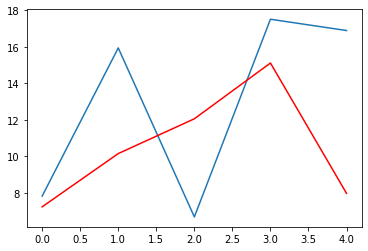

In [110]:
pyplot.plot(test.values)
pyplot.plot(predict, color='red')

#### PREMON

In [111]:
stepwise_model = auto_arima(ldh_PREMON['LEVEL'], start_p=1, start_q=1,m=1,d=0,
                           max_p=6, max_q=6,
                           start_P=0,start_Q = 0,D=0, seasonal=False,
                           error_action='ignore',  
                           suppress_warnings=True 
                           ,stepwise=True)
print(stepwise_model)

ARIMA(order=(1, 0, 2), suppress_warnings=True)


In [112]:
train_size = int(ldh_PREMON.shape[0]*0.8)
train, test = ldh_PREMON.LEVEL[0:train_size], ldh_PREMON.LEVEL[train_size:]

In [116]:
data = train
predict =[]
for t in test:
    model = ARIMA(data, order=(1,0,0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0][0])
    predict.append(y[0][0])
    data = np.append(data, t)
    data = pd.Series(data)

13.339351544454594
13.538125604052553
14.147243999851696
10.914775770547719
10.801819892476335


In [117]:
mse = mean_squared_error(test.values, predict)
mse

8.235919082256633

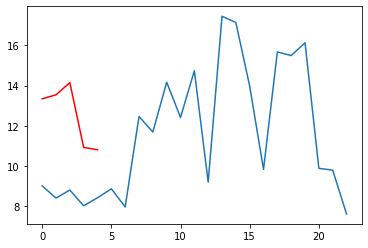

In [118]:
pyplot.plot(data)
pyplot.plot(predict, color='red')

#### MONSOON

In [119]:
stepwise_model = auto_arima(ldh_MONSOON['LEVEL'], start_p=1, start_q=1,
                           max_p=6, max_q=6,
                           start_P=0, seasonal=False,
                           d=1,# D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True) 
                           #stepwise=True)
print(stepwise_model)

ARIMA(order=(0, 1, 0), suppress_warnings=True, with_intercept=False)


In [120]:
train_size = int(ldh_MONSOON.shape[0]*0.8)
train, test = ldh_MONSOON.LEVEL[0:train_size], ldh_MONSOON.LEVEL[train_size:]

In [121]:
data = train
predict =[]
for t in test:
    model = ARIMA(data, order=(0,1,0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0][0])
    predict.append(y[0][0])
    data = np.append(data, t)
    data = pd.Series(data)

10.887825311942956
15.605209475709472
6.052066004171263
6.846707824513786
7.6208802807596605


In [122]:
mse = mean_squared_error(test.values, predict)
mse

21.987827127188844

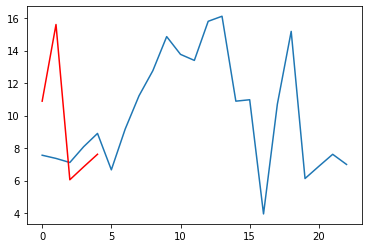

In [123]:
pyplot.plot(data)
pyplot.plot(predict, color='red')

#### POMKH

In [124]:
stepwise_model = auto_arima(ldh_POMKH['LEVEL'], start_p=1, start_q=1,
                           max_p=6, max_q=6,
                           start_P=0, seasonal=False,
                           d=1,# D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True) 
                           #stepwise=True)
print(stepwise_model)

ARIMA(order=(0, 1, 0), suppress_warnings=True, with_intercept=False)


In [125]:
train_size = int(ldh_POMKH.shape[0]*0.8)
train, test = ldh_POMKH.LEVEL[0:train_size], ldh_POMKH.LEVEL[train_size:]

In [126]:
test

QUARTER
2014-10-01    15.687857
2015-10-01    16.814462
2016-10-01    17.333284
2017-10-01    17.888030
2018-10-01     6.910000
Name: LEVEL, dtype: float64

In [127]:
data = train
predict =[]
for t in test:
    model = ARIMA(data, order=(0,1,0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0][0])
    predict.append(y[0][0])
    data = np.append(data, t)
    data = pd.Series(data)

10.603814616755795
16.11139129389129
17.27499938388334
17.79673563998191
18.355829725829725


In [128]:
mse = mean_squared_error(test.values, predict)
mse

31.472109210391192

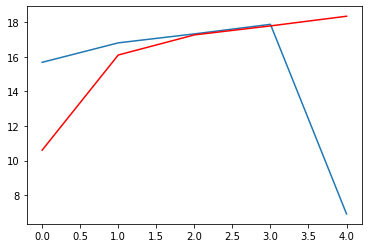

In [130]:
pyplot.plot(test.values)
pyplot.plot(predict, color='red')

In [131]:
future_forecast = stepwise_model.predict()

In [134]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).iplot()

ValueError: Shape of passed values is (10, 1), indices imply (5, 1)

In [135]:
pd.concat([data,future_forecast],axis=1).iplot()

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [136]:
mse = mean_squared_error(test, future_forecast)
mse

ValueError: Found input variables with inconsistent numbers of samples: [5, 10]

# SARIMA

In [137]:
#taking dataset of ludhiana district only
ldh_df = pd.DataFrame(df['LEVEL'][df.DISTRICT == 'Ludhiana'])
ldh_df.head()

,LEVEL
QUARTER,
1996-01-01,7.923939
1996-04-01,9.001212
1996-07-01,7.561515
1996-10-01,8.064242
1997-01-01,7.869687


In [138]:
ldh_df['t'] = ldh_df.shift(1)

In [139]:
ldh_df.head()

,LEVEL,t
QUARTER,,
1996-01-01,7.923939,NaN
1996-04-01,9.001212,7.923939
1996-07-01,7.561515,9.001212
1996-10-01,8.064242,7.561515
1997-01-01,7.869687,8.064242


In [140]:
train_size = int(ldh_df.shape[0]*0.8)
train_size

73

In [141]:
train = ldh_df[0:train_size]
test = ldh_df[train_size:]

In [142]:
train.shape

(73, 2)

In [143]:
test.shape

(19, 2)

In [144]:
train_X, train_y = train['t'], train['LEVEL']
test_X, test_y = test['t'], test['LEVEL']

In [145]:
predictions = test_X.copy()

In [146]:
mse = mean_squared_error(test_y, predictions)
mse

40.14313588020725

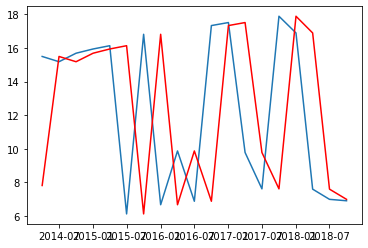

In [147]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

In [148]:
ldh_df = pd.DataFrame(df['LEVEL'][df.DISTRICT == 'Ludhiana'])

In [149]:
stepwise_model = auto_arima(ldh_df['LEVEL'], start_p=0, start_q=0,d=0,
                           max_p=6, max_q=6, max_d=2,m=3,
                start_P=0, start_Q=0,D=0,
                           max_P=6, max_Q=6, max_D=2,
                           error_action='ignore',  
                           suppress_warnings=True) 
                           #stepwise=True)
print(stepwise_model)

ARIMA(order=(1, 0, 1), seasonal_order=(0, 0, 1, 3), suppress_warnings=True)


In [150]:
ldh_df = pd.DataFrame(df['LEVEL'][df.DISTRICT == 'Ludhiana']).reset_index()
ldh_df.drop(['QUARTER'], axis=1, inplace=True)
print(ldh_df.head())
train_size = int(ldh_df.shape[0]*0.95)
train, test = ldh_df.LEVEL[0:train_size], ldh_df.LEVEL[train_size:]

      LEVEL
0  7.923939
1  9.001212
2  7.561515
3  8.064242
4  7.869687


In [151]:
type(train)

pandas.core.series.Series

In [152]:
test

87    17.888030
88    16.893788
89     7.600909
90     6.994545
91     6.910000
Name: LEVEL, dtype: float64

In [153]:
dt = train
predict =[]
for t in test:
    model = SARIMAX(dt, order=(1,0,1), seasonal_order=(0,0,1,3))
    model_fit = model.fit()
    x = model_fit.forecast()
    print(x.values[0])
    predict.append(x.values[0])
    dt = np.append(dt, t)
    dt = pd.Series(dt)

9.502402709810422
13.998647772097957
15.155580280629165
10.803478989471646
9.873211899531444


In [154]:
mse = mean_squared_error(test.values, predict)
mse

31.812448517866347

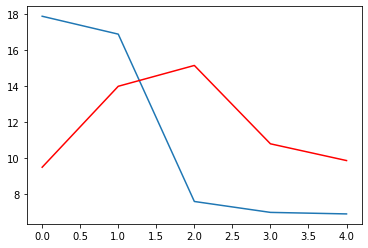

In [155]:
pyplot.plot(test.values)
pyplot.plot(predict, color='red')